<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# SQL Together Lab: Learning SQL Syntax

_Instructor: Aymeric Flaisler_

---




### Learning Objectives
*After this lesson, you will be able to:*
- Sort results by column using `ORDER BY`.
- Simplify your syntax using aliases (`AS`).
- Match patterns using `LIKE`.
- Select distinct items using `DISTINCT`.
- Aggregate values using `GROUP BY`.
- Filter on aggregations using `HAVING`.
- Apply `IF/THEN` logic using `CASE`.
- Use `EXTRACT` to get date parts.

### Lesson Guide
- [Install `psycopg2`](#install-psycopg2)
- [Connect to a Remote Database](#connect-to-remote)
- [Some Notes on Syntax](#syntax-notes)
- [ORDER BY](#order-by)
- [Alias `AS`](#alias-as)
- [LIKE](#like-operator)
- [DISTINCT](#distinct)
- [LIMIT](#limit)
- [GROUP BY](#group-by)
- [HAVING](#having)
- [CASE Statements](#case)
- [Working with Dates](#dates)
- [Additional Exercises](#additional-exercises)
- [Conclusion](#conclusion)
- [Additional Resources](#additional-resources)


<a id='install-psycopg2'></a>
## Install `psycopg2`

---

Enter in your CLI: 

`pip install -U psycopg2`



<a id='connect-to-remote'></a>
## Connect to a Remote Database

---

This is the database we are going to be working with:
https://northwinddatabase.codeplex.com/

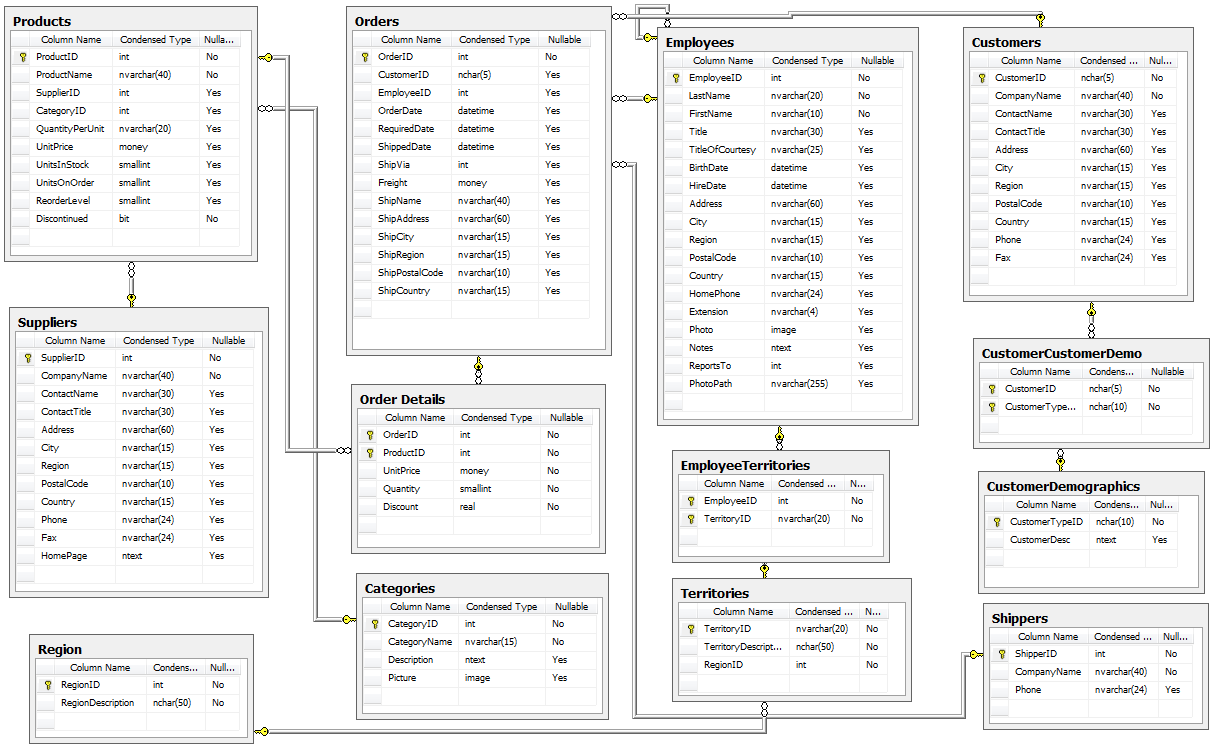

In [1]:
from sqlalchemy import create_engine
import psycopg2
import pandas as pd

conn_str = "host='dsi.c20gkj5cvu3l.us-east-1.rds.amazonaws.com' dbname='northwind' user='dsi_student' password='gastudents'"
conn = psycopg2.connect(conn_str)

<a id='syntax-notes'></a>

## Some Notes on Syntax

---

The [Northwind Database Schema](https://northwinddatabase.codeplex.com/) will come in handy for writing solutions to the problems below. 

1. You should wrap column names in double quotes (**"column_name"**).
2. You can comment out a line by including a double dash in front (**--**).
3. You should wrap a string in single quotes (**'string'**).

```*.sql
SELECT "ProductID" as "PID"
FROM Products
WHERE "ProductName" like '%a' 
--AND 
```

<a id='order-by'></a>

## `ORDER BY`

---

    The `ORDER BY` keyword is used to sort a result set by one or more columns. It sorts records in ascending order by default. To sort the records in descending order, you can use the `DESC` keyword.

### SQL `ORDER BY` Syntax

```*.sql
SELECT column_name1, column_name2  
FROM table_name  
ORDER BY column_name1 ASC, column_name2 DESC;
``` 

### Exercise #1:

Select the `ProductID`, `ProductName`, `SupplierID`, and `UnitPrice` for all `Products` with a `UnitPrice > 25`, ordered by `SupplierID` descending and then `UnitPrice` ascending.

In [2]:
# A:
SQL_STRING = '''

SELECT "ProductID" as "PID","ProductName","SupplierID","UnitPrice"
FROM Products 

ORDER BY "SupplierID" DESC, "UnitPrice" ASC

'''

df = pd.read_sql(SQL_STRING, con=conn)
df.head()

,PID,ProductName,SupplierID,UnitPrice
0,61,Sirop d'érable,29,28.50
1,62,Tarte au sucre,29,49.30
2,60,Camembert Pierrot,28,34.00
3,59,Raclette Courdavault,28,55.00
4,58,Escargots de Bourgogne,27,13.25


<a id='alias-as'></a>
## Alias `AS`

---

SQL aliases are used to give a database table — or a column in a table — a temporary name. Aliases are often created for two purposes:
1. To make output column names more readable (substitute names). 
2. To make queries more concise (shorten query arguments).

### SQL Alias Syntax for Columns

```*.sql
SELECT column_name AS alias_name  
FROM table_name;
```

### SQL Alias Syntax for Tables

```*.sql
SELECT column_name(s)  
FROM table_name AS alias_name;
```



### Exercise #2

Select `SupplierID` and `CompanyName` from the `Suppliers` table, aliasing these columns as `Supplier No.` and `Company Name`, respectively. Additionally, alias the `Suppliers` table as `S`. Order by `CompanyName` ascending.

In [ ]:
# A:

**Aliases can be useful when:**

- More than one table is involved in a query.
- Functions are used in the query.
- Column names are long and/or not very readable.
- Two or more columns are combined together.

<a id='like-operator'></a>
## SQL's `LIKE` Operator

---

The `LIKE` operator is used in a `WHERE` clause to search for a specific pattern within a column.


### SQL `LIKE` Syntax

```*.sql

SELECT column_name(s) 
FROM table_name  
WHERE column_name LIKE pattern;

```

> **Tip**: The `"%"` sign is used to define wildcards (missing letters) both before and after the pattern. Also, notice that PostgreSQL is case sensitive.

### Exercise #3

In descending order, select all products from the `Products` table with a `ProductName` that contains "ch." Alias this column as `Ch Products`. 

In [ ]:
# A:

### Exercise #4

In ascending order, select all products from the `Suppliers` table with a `City` that starts with "S." Alias this column as `S Cities`. 

In [ ]:
# A:

<a id='distinct'></a>
## The `DISTINCT` operator

---

The `SELECT DISTINCT` statement is used to return _only_ distinct (unique) values. In a table, a column may contain many duplicate values; sometimes you'll only want to list the unique ones.

### `SELECT DISTINCT` Syntax

```*.sql

SELECT DISTINCT column_name1, column_name2 
FROM table_name;

```

### Exercise #5

`SELECT DISTINCT` `SupplierID`, `ProductName`, and `UnitPrice` from the `Products` table, ordering by `UnitPrice` ascending (i.e., the cheapest product for each supplier).

In [ ]:
# A:

<a id='limit'></a>

## The `LIMIT` operator

---

Sometimes, we may want to only retrieve a fixed number of records from a database. This is where the `LIMIT` operator comes in handy.


### `LIMIT` Syntax

```*.sql

SELECT column_name1, column_name2  
FROM table_name
LIMIT number_of_records;

```

### Exercise #6

In ascending order, return the five highest-priced products that contain an "a" in the product name. Alias the column as `Top 5 A Products`.

In [ ]:
# A:

_**Tip:** If you are finding this one a bit tricky to execute in one query, check out [SQL Subqueries](https://www.tutorialspoint.com/sql/sql-sub-queries.htm)._

<a id='group-by'></a>
## `GROUP BY` Operator

---

A table may contain several records that have a common key. 

The `GROUP BY` statement is used in conjunction with aggregate functions to group a result set by one or more columns. For example, we may want to know the total number of items purchased in each order.

### `GROUP BY` Syntax

```*.sql
SELECT column_name, aggregate_function(column_name)  
FROM table_name  
WHERE column_name operator value  
GROUP BY column_name;
```

The aggregate functions you can use with `GROUP BY` are:
- **`COUNT`**
- **`MIN`**
- **`MAX`**
- **`SUM`**
- **`AVG`**

### Exercise #7

From the `Order_details` table, show the count of orders per `OrderID`, as well as the `SUM` of the revenue (`UnitPrice * Quantity`). Order by revenue.

In [ ]:
# A:

<a id='having'></a>
## The `HAVING` operator

---

The `HAVING` clause was added to SQL because the `WHERE` keyword could not be used with aggregate functions. `HAVING` allows us to apply a filter while querying with them. For example, if we only wanted to show companies that had revenues greater than $10,000 (as calculated by an aggregate function).

### `HAVING` Syntax

``` *.sql

SELECT column_name, aggregate_function(column_name)
FROM table_name
WHERE column_name operator value
GROUP BY column_name
HAVING aggregate_function(column_name) operator value;

```

### Exercise #8

Show the revenue of all orders with more than one item.

In [ ]:
# A:

<a id='case'></a>
## `CASE` statements

---

The `CASE` statement is SQL’s way of applying `IF/THEN` logic. The `CASE` statement is followed by at least one pair of `WHEN` and `THEN` statements. It must end with an `END` statement. The `ELSE` statement is optional and provides a way to capture values not specified in the `WHEN/THEN` statements.

### `CASE` Syntax

```*.sql
SELECT 
    CASE WHEN column_name operator value THEN 'string value1'
        WHEN column_name operator value THEN 'string value2'
        ELSE 'string value3' END AS 'alias'         
FROM table_name
```

### A Pseudocode Example

```*.sql
SELECT name
    CASE WHEN age < 1 THEN 'infant'
         WHEN age < 2 THEN 'toddler'
         WHEN age < 5 THEN 'child'
         ELSE 'old as dirt' END AS 'Persons Age'
```

### Exercise #9

Select `CompanyName`, `City`, and `Country` from the `Suppliers` table. Add a new column, `D_F`, which contains a value of "domestic" if the supplier is from the United States and "foreign" if not.

In [ ]:
# A:

<a id='dates'></a>
## Working With Dates

---

Take some time to look over the [PostgreSQL date documentation](https://www.postgresql.org/docs/8.1/static/functions-datetime.html).

### Extracting Date Parts From a Date Object
```*.sql
SELECT my_date,
       EXTRACT('year'   FROM my_date) AS year,
       EXTRACT('month'  FROM my_date) AS month,
       EXTRACT('day'    FROM my_date) AS day,
       EXTRACT('hour'   FROM my_date) AS hour,
       EXTRACT('minute' FROM my_date) AS minute,
       EXTRACT('second' FROM my_date) AS second,
       EXTRACT('decade' FROM my_date) AS decade,
       EXTRACT('dow'    FROM my_date) AS day_of_week
  FROM table_name
```

### Exercise #10

Select `OrderDate` and `Freight` from the `Orders` table, along with three new columns for `Year`, `Month`, and `Day`. Make sure these are [_**cast**_ as integers, not floats](http://www.postgresqltutorial.com/postgresql-cast/).

After extracting the dates as integers, pull out the `Year`, `Month`, and `SUM` of `Freight`, aliased as `FreightPerMonth`, grouping by the year and month, but only where the freight per month is greater than 5,000.

Order this DataFrame by year and month descending.

In [ ]:
# A:

<a id='additional-exercises'></a>

### Exercise #11

From the `Orders` table, find the average number of days it took to ship a package per `ShipCountry`. Only include orders that have a ship date, and only show the top five results.

In [ ]:
# A:

### Exercise #12

In the `Orders` table, find the top five countries by average freight cost of products shipped in 1998.

In [ ]:
# A:

### Exercise #13

From the `Employees` table, find the two women who were hired the most recently. Exclude entries where gender is ambiguous.  
_**Tip:** You may want to investigate the "TitleOfCourtesy" column._

In [ ]:
# A:

In [ ]:
# A:

### Exercise #14

Split products from the `Products` table into three price categories:
- **Cheap**: Less than $10.
- **Fair**: $10 to $50.
- **Expensive**: Greater than $50.

Return the count-per-product price categories, along with the `MIN`, `MAX`, and `AVG`. 

In [ ]:
# A:

<a id='conclusion'></a>
## Conclusion

---

In this lesson, we've learned many new commands for making powerful SQL queries.

In particular, we learned how to:

- Sort results by column using `ORDER BY`.
- Simplify our syntax using aliases.
- Match patterns using `LIKE`.
- Select distinct items using `DISTINCT`.
- Aggregate values using `GROUP BY`.
- Filter aggregations using `HAVING`.
- Apply `IF/THEN` logic using `CASE`.
- Use `EXTRACT` to get date parts.

**Can you think of a few more business cases where these capabilities would be useful?**

<a id='additional-resources'></a>
## Additional Resources

---

- [PostgreSQL Documenation](https://www.postgresql.org/docs/)
- [Mode Analytics Tutorial](https://community.modeanalytics.com/sql/tutorial/introduction-to-sql/)